# Module 5 Assesment: Wholesales

# Step 1/2
Download and Read the dataset into a Pandas Dataframe

In [ ]:
import pandas as pd
df = pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [2]:
# Does the dataset include any missing values? 
print(df.isnull().sum(axis = 0))
before_drop = df.shape
print('Shape Before NA Drop: ', before_drop)
df.dropna
after_drop = df.shape
print("Shape After NA Drop: ", after_drop)
if before_drop == after_drop:
    print("No NA Values detected")
else:
    print("NA Values have been dropped")

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Shape Before NA Drop:  (440, 8)
Shape After NA Drop:  (440, 8)
No NA Values detected


# Step 3: Feature Selection
Either exclude the Channel and Region from the considered features or think of a way to make them meaningfully impact the analysis.

Hint: Directly using the provided numerical values for Regions is not very wise and can skew the resulting clustering!

In [3]:
df.drop(['Channel', 'Region'], axis = 1, inplace = True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


# Step 4: Preprocessing
Perform any needed pre-processing on the chosen features including: Scaling, Encoding, Dealing with Nan values.
Hint: Use only the preprocessing steps you think useful.

In [4]:
# description of dataset
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# Column Info - Run one line at a time to get info
# print(df['Fresh'].value_counts())
# print(df['Milk'].value_counts())
#print(df['Grocery'].value_counts())
#print(df['Frozen'].value_counts())
#print(df['Detergents_Paper'].value_counts())
# print(df['Delicassen'].value_counts())

In [5]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)
# There is no y(target) data in the dataset meaning that the output class is unknown therefore an unsupervised machine learning method
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

# Step 5: Clustering Using K-Means
  Try to visualize the elbow-curve and decide from it the best k and print it.


Clustering Metrics
Print the inertia every time you try a different value for k.

In [7]:
# Use a k-means instance to cluster the data.
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=2, tol=0.01, random_state=0).fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
# Adding Clusters to DataFrame
df['clusters'] = clusters.tolist()
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,0


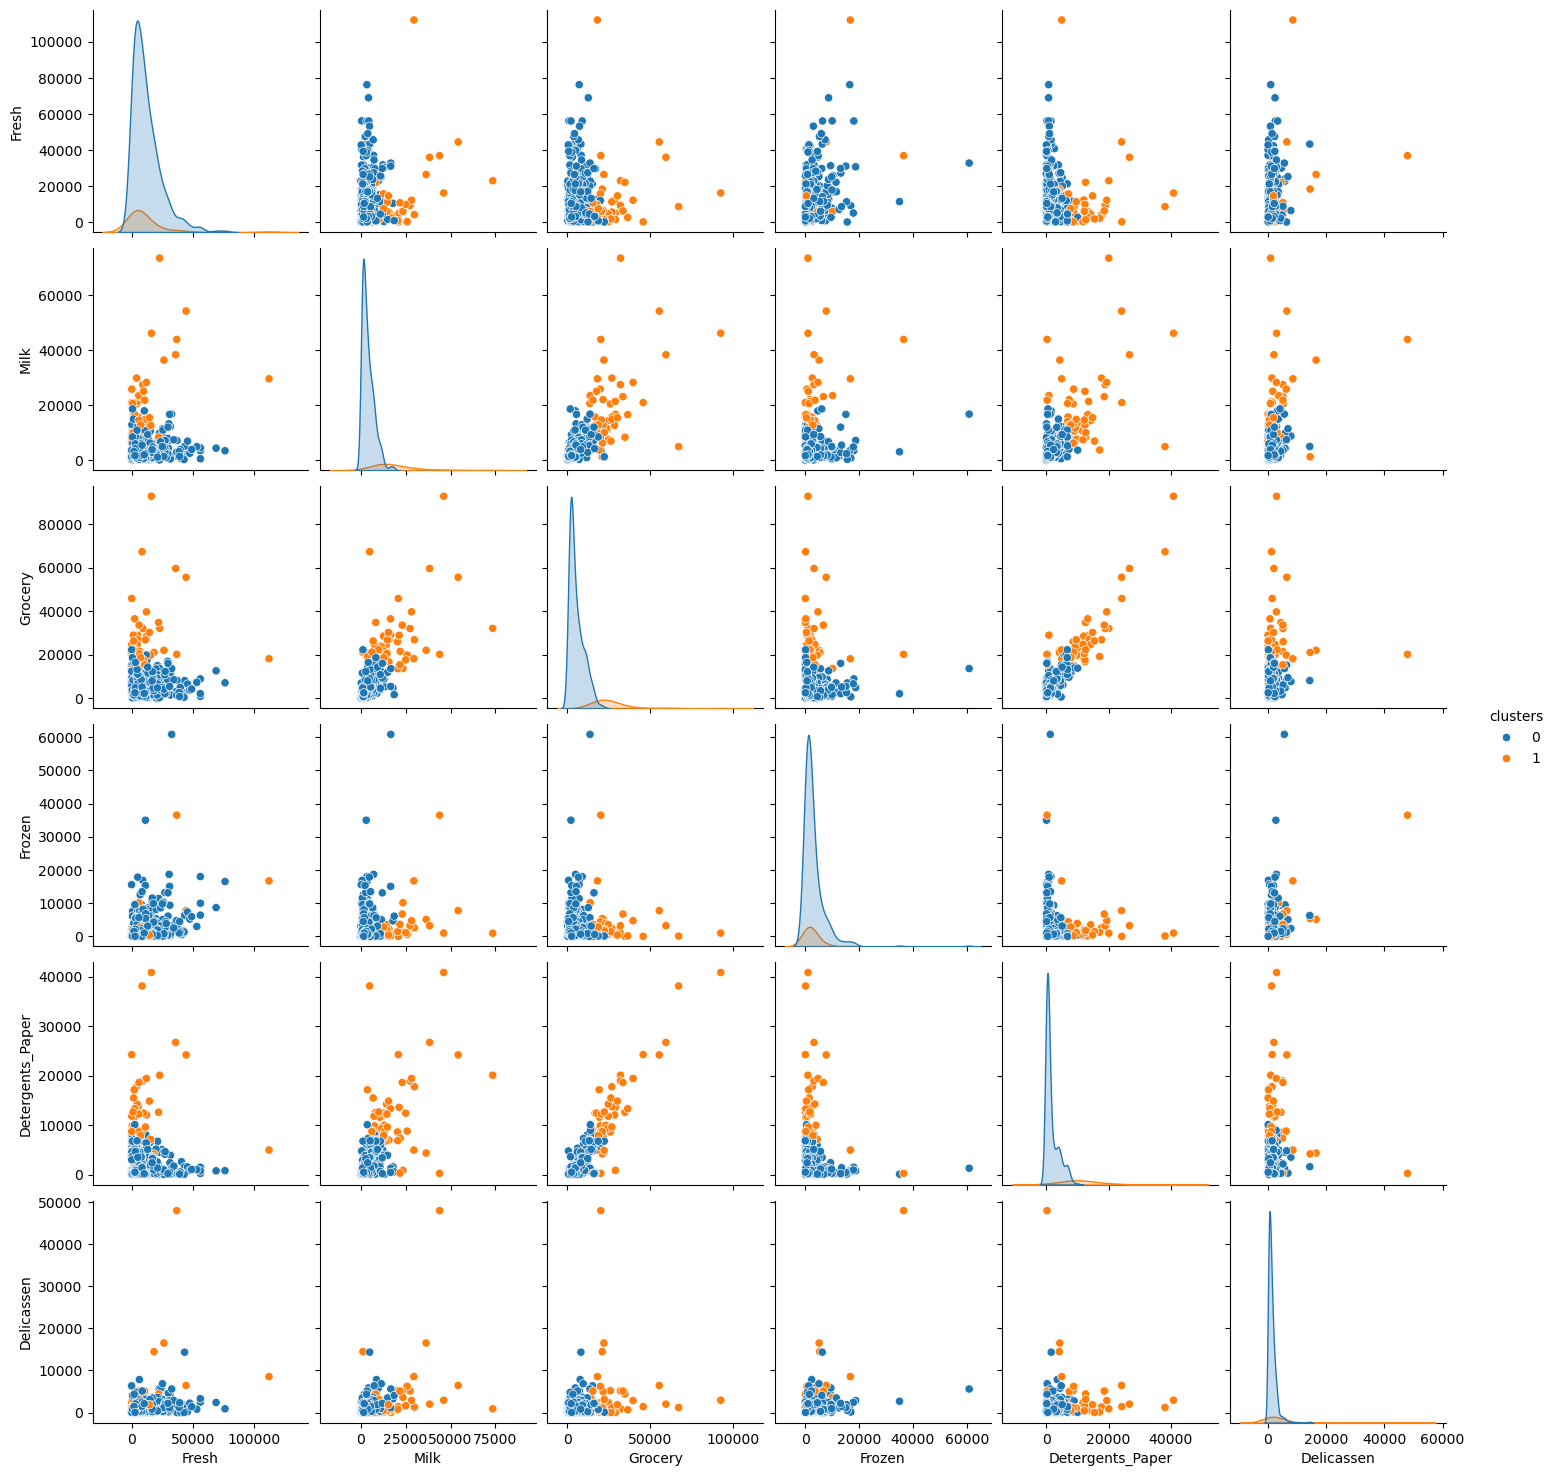

In [9]:
# Visualize as Pair Plot to see current state of data clusters as a reference of optimization
import seaborn as sns
sns.pairplot(df, hue = "clusters")

In [10]:
# Optimize different values of k for the K-means algorithm.
distortions = []
spread = range(1,26)
for k in spread:
    model = KMeans(n_clusters=k, tol = 0.01, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)
print(distortions)

[2640.000000000001, 1956.212172641793, 1657.9678603942566, 1357.0973376761203, 1061.0752298382633, 945.7977746164784, 854.4314136718497, 767.8058228960676, 666.2615712884808, 638.6783450843769, 596.8785597444345, 530.2415345503647, 492.14568790597696, 475.56776417457587, 463.76705092145306, 425.87679384881733, 394.30973816511147, 369.45399968643756, 357.9038138183902, 338.12300878763097, 311.61354629779873, 294.13688962333816, 281.8604136943192, 272.5608234095928, 261.85547277537654]


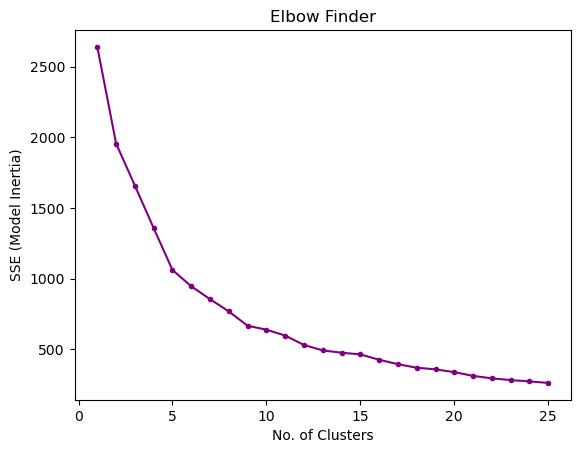

In [12]:
# Plot the different k values for visualization
import matplotlib.pyplot as plt
plt.plot(spread, distortions, marker = '.', c = 'purple')
plt.title("Elbow Finder")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE (Model Inertia)")
plt.show()

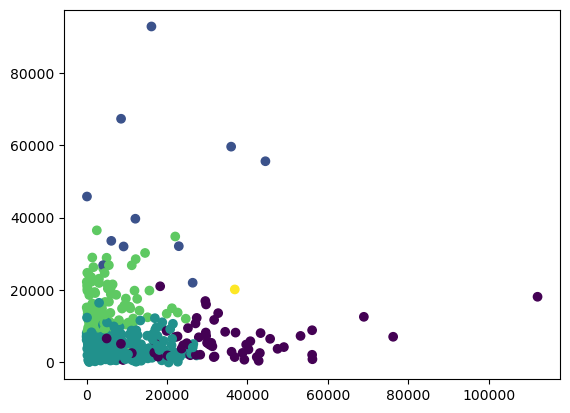

In [ ]:
clusters = KMeans(n_clusters=5, tol=0.01, random_state=0).fit_predict(X)
df['clusters_optimized'] = clusters.tolist()
plt.scatter(df['Fresh'], df['Grocery'], c=df.clusters_optimized)
# compare with other scatterplots (pair plot) to see if clusters make sense

# Challenge Yourself (Optional)
Repeat the cluster modeling using Hierarchal Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering
agg_Cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_Cluster.fit_predict(X)
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [18]:
df['clusters_agg'] = clusters.tolist()
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters,clusters_optimized,clusters_agg
0,12669,9656,7561,214,2674,1338,0,2,0
1,7057,9810,9568,1762,3293,1776,0,3,0
2,6353,8808,7684,2405,3516,7844,0,3,0
3,13265,1196,4221,6404,507,1788,0,2,4
4,22615,5410,7198,3915,1777,5185,0,0,2
...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,0,2
436,39228,1431,764,4510,93,2346,0,0,2
437,14531,15488,30243,437,14841,1867,1,3,0
438,10290,1981,2232,1038,168,2125,0,2,4


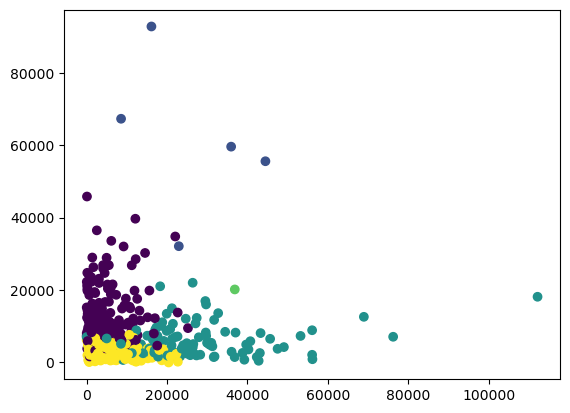

In [19]:
plt.scatter(df['Fresh'], df['Grocery'], c=df.clusters_agg)